In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("customer_data.csv")

In [3]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [4]:
df.shape

(2512, 11)

In [5]:
df.columns

Index(['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status',
       'State_names', 'Segment', 'Employees_status', 'Payment_method',
       'Referal', 'Amount_spent'],
      dtype='object')

In [6]:
df.dtypes

Transaction_date     object
Transaction_ID        int64
Gender               object
Age                 float64
Marital_status       object
State_names          object
Segment              object
Employees_status     object
Payment_method       object
Referal             float64
Amount_spent        float64
dtype: object

In [7]:
df.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

In [8]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [10]:
data = df.copy()

In [11]:
data.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

In [12]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Amount_spent"] = data["Amount_spent"].fillna(data["Amount_spent"].median())

In [13]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Marital_status"] = data["Marital_status"].fillna(data["Marital_status"].mode()[0])
data["State_names"] = data["State_names"].fillna(data["State_names"].mode()[0])

In [14]:
data["Transaction_date"] = pd.to_datetime(data["Transaction_date"])

In [15]:
data.duplicated().sum()
data = data.drop_duplicates()

In [16]:
data.columns = data.columns.str.lower().str.strip()

In [17]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  2500 non-null   datetime64[ns]
 1   transaction_id    2500 non-null   int64         
 2   gender            2500 non-null   object        
 3   age               2500 non-null   float64       
 4   marital_status    2500 non-null   object        
 5   state_names       2500 non-null   object        
 6   segment           2500 non-null   object        
 7   employees_status  2474 non-null   object        
 8   payment_method    2500 non-null   object        
 9   referal           2346 non-null   float64       
 10  amount_spent      2500 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 234.4+ KB


transaction_date      0
transaction_id        0
gender                0
age                   0
marital_status        0
state_names           0
segment               0
employees_status     26
payment_method        0
referal             154
amount_spent          0
dtype: int64

In [18]:
data["employees_status"] = data["employees_status"].fillna("Unknown")
data["referal"] = data["referal"].fillna(0)

In [19]:
data["referal"] = data["referal"].astype(int)

In [20]:
data["transaction_year"] = data["transaction_date"].dt.year
data["transaction_month"] = data["transaction_date"].dt.month

In [21]:
bins = [0, 25, 35, 45, 60, 100]
labels = ["18-25", "26-35", "36-45", "46-60", "60+"]

data["age_group"] = pd.cut(data["age"], bins=bins, labels=labels)

In [22]:
data["spending_category"] = pd.qcut(
    data["amount_spent"],
    q=3,
    labels=["Low", "Medium", "High"]
)

In [23]:
data.head()

,transaction_date,transaction_id,gender,age,marital_status,state_names,segment,employees_status,payment_method,referal,amount_spent,transaction_year,transaction_month,age_group,spending_category
0,2019-01-01,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1,2051.360,2019,1,18-25,High
1,2019-01-01,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0,544.040,2019,1,46-60,Low
2,2019-01-01,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1,1572.600,2019,1,60+,Medium
3,2019-01-01,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,1,1199.790,2019,1,18-25,Medium
4,2019-01-01,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0,1341.435,2019,1,26-35,Medium


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   2500 non-null   datetime64[ns]
 1   transaction_id     2500 non-null   int64         
 2   gender             2500 non-null   object        
 3   age                2500 non-null   float64       
 4   marital_status     2500 non-null   object        
 5   state_names        2500 non-null   object        
 6   segment            2500 non-null   object        
 7   employees_status   2500 non-null   object        
 8   payment_method     2500 non-null   object        
 9   referal            2500 non-null   int64         
 10  amount_spent       2500 non-null   float64       
 11  transaction_year   2500 non-null   int32         
 12  transaction_month  2500 non-null   int32         
 13  age_group          2500 non-null   category      
 14  spending_cate

In [25]:
data["amount_spent"].describe()

count    2500.000000
mean     1412.057466
std       836.330070
min         2.090000
25%       734.862500
50%      1341.435000
75%      1957.025000
max      2999.980000
Name: amount_spent, dtype: float64

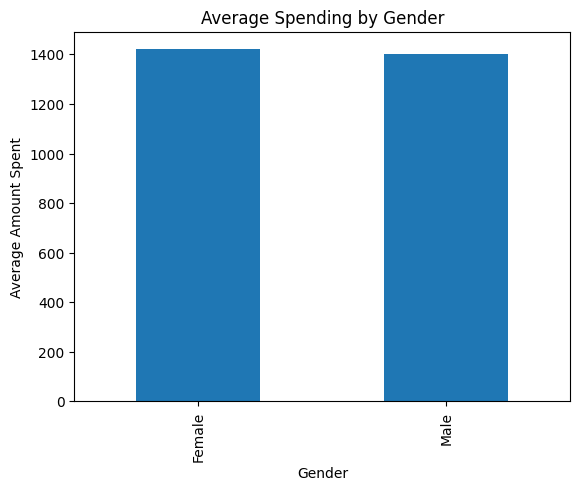

In [26]:
gender_spend = data.groupby("gender")["amount_spent"].mean()

gender_spend.plot(kind="bar")
plt.title("Average Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Amount Spent")
plt.show()

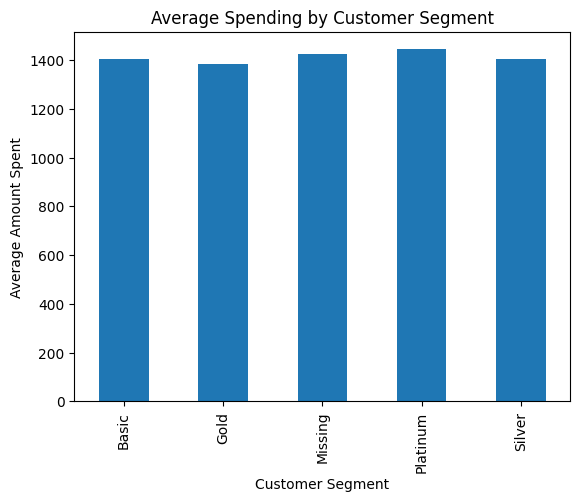

In [27]:
segment_spend = data.groupby("segment")["amount_spent"].mean()

segment_spend.plot(kind="bar")
plt.title("Average Spending by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Amount Spent")
plt.show()

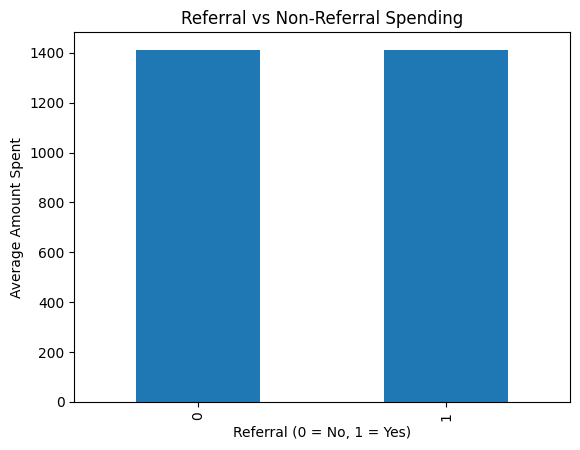

In [28]:
# spending comparison for referral vs non-referral
referral_spend = data.groupby("referal")["amount_spent"].mean()

referral_spend.plot(kind="bar")
plt.title("Referral vs Non-Referral Spending")
plt.xlabel("Referral (0 = No, 1 = Yes)")
plt.ylabel("Average Amount Spent")
plt.show()

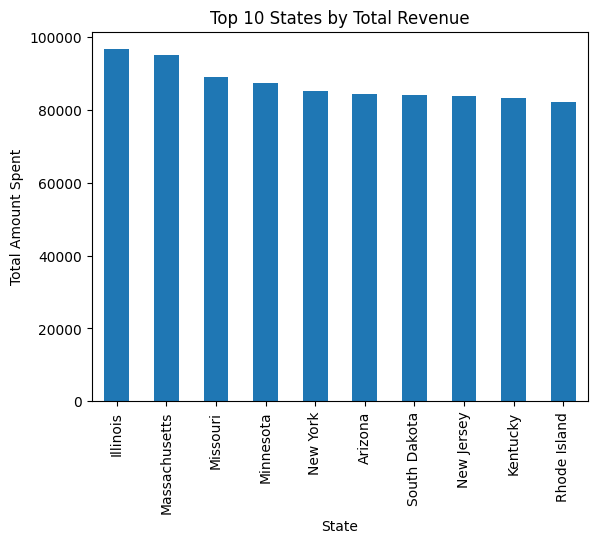

In [29]:
# total spending by state
state_spend = data.groupby("state_names")["amount_spent"].sum()

# top 10 states
top_states = state_spend.sort_values(ascending=False).head(10)

top_states.plot(kind="bar")
plt.title("Top 10 States by Total Revenue")
plt.xlabel("State")
plt.ylabel("Total Amount Spent")
plt.show()

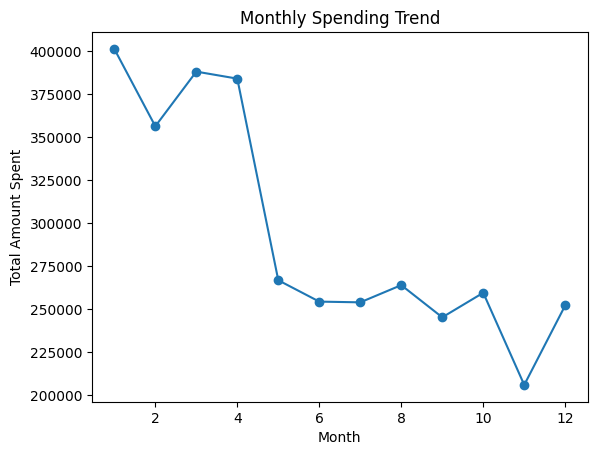

In [30]:
# monthly spending trend
monthly_spend = data.groupby("transaction_month")["amount_spent"].sum()

monthly_spend.plot(kind="line", marker="o")
plt.title("Monthly Spending Trend")
plt.xlabel("Month")
plt.ylabel("Total Amount Spent")
plt.show()

In [31]:
y = data["amount_spent"]
X = data[
    [
        "age",
        "referal",
        "transaction_month"
    ]
]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", round(r2, 2))
print("Mean Absolute Error:", round(mae, 2))

R2 Score: -0.01
Mean Absolute Error: 684.39


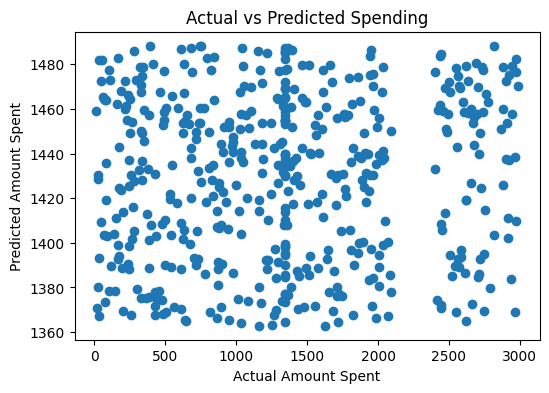

In [36]:
plt.figure(figsize=(6, 4))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Amount Spent")
plt.ylabel("Predicted Amount Spent")
plt.title("Actual vs Predicted Spending")

plt.show()